In [2]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
from matplotlib import pyplot as plt
%matplotlib inline

In [3]:
fasion_mnist = keras.datasets.fashion_mnist

In [5]:
(x_train,y_train),(x_test,y_test) = fasion_mnist.load_data()

4431872/4422102 [==============================] - 0s 0us/step


In [12]:
x_train.shape

(60000, 28, 28)

In [13]:
y_train.shape

(60000,)

In [21]:
def plot_image(index):
  plt.figure(figsize=(10,1))
  plt.imshow(x_train[index])

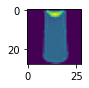

In [22]:
plot_image(2)

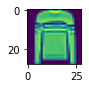

In [23]:
plot_image(5)

In [24]:
classess = ['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [28]:
classess[y_train[9]]

'Sandal'

In [30]:
x_train_scaled = x_train/255
x_test_scaled = x_test/255

In [31]:
x_train_scaled[4]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.10196078, 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.74117647, 0.80784314,
        0.73333333, 0.1254902 , 0.        , 0.        , 0.        ,
        0.10196078, 0.85098039, 0.88627451, 0.76862745, 0.04313725,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.75294118, 0.89019608,
        0.91764706, 0.95294118, 0.90196078, 0.57647059, 0.9372549 ,
        0.94901961, 0.9176

In [34]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes= 10, dtype='float32'
)

In [35]:
y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes=10, dtype='float32'
)



**1.WE ARE USING STOCHASTIC GRADIANT DESCENT (SGD) OPTIMIZER BECAUSE DATA SET IS 
LITTLE BIGGER.**


**2.LOSS FUNCTION WE ARE USING CATEGORICAL CROSS ENTROPY BECAUSE Y_TRAIN WE ONE HOT ENCODED.(OTHERWISE FOR DISCRETE VALUES WE MUST USE SPARSE CATEGORICAL CROSS ENTROPY.**

In [38]:
model = keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(750, activation='relu'),
        keras.layers.Dense(550, activation='relu'),
        keras.layers.Dense(350, activation='relu'),
        keras.layers.Dense(200, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid'),
])

model.compile(
    optimizer = 'SGD',
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model.fit(x_train_scaled,y_train_categorical,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 24s 13ms/step - loss: 0.6910 - accuracy: 0.7698
Epoch 2/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4519 - accuracy: 0.8404
Epoch 3/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.4021 - accuracy: 0.8568
Epoch 4/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3708 - accuracy: 0.8663
Epoch 5/5
1875/1875 [==============================] - 23s 12ms/step - loss: 0.3469 - accuracy: 0.8756


***MODEL PREDICTION ***

In [47]:
classess[np.argmax(model.predict(x_test_scaled)[8])]

'Sandal'

**ACTUAL RESULT**

In [49]:
classess[y_test[8]]

'Sandal'